<a href="https://colab.research.google.com/github/josee-pp/03MIAR-Algoritmos-de-Optimizacion-2026/blob/master/AG2/Jos%C3%A9_Enrique_Pinz%C3%B3n_Parra_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AG2 - Actividad Guiada 2
Nombre: José Enrique Pinzón Parra <br>
Link:   https://colab.research.google.com/drive/1F5JzuUZQ3usMeydx-aDlDWlPz7kxJpPY?usp=sharing<br>
Github: https://github.com/josee-pp/03MIAR-Algoritmos-de-Optimizacion-2026/blob/master/AG2/Jos%C3%A9_Enrique_Pinz%C3%B3n_Parra_AG2.ipynb
<br>




In [84]:
import math

##Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

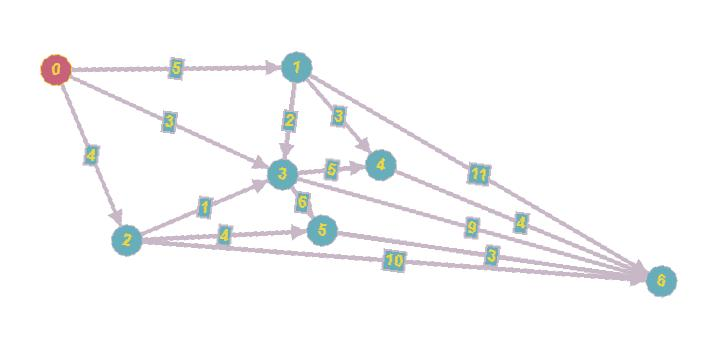

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [85]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,float("inf"),999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [86]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n
  RUTA = [ [""]*N for i in [""]*N]

  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA

In [87]:
PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [88]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta])

print("\nLa ruta pasa por :")
print(calcular_ruta(RUTA, 0,6) )
print("Con valor" , PRECIOS[0][6])



La ruta pasa por :
0,2,5
Con valor 11


##Problema de Asignacion de tarea

In [89]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


In [90]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i]
  return VALOR



valor((0, 1, 2, 3  ),COSTES)

73

In [91]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

print(CI((0,1),COSTES))
print(CS((0,1),COSTES))

68
74


In [92]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [93]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [94]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


##Descenso del gradiente

In [95]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide por le metodo del descenso del gradiente : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [96]:
#Definimos la funcion(f) y el gradiente(df)
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

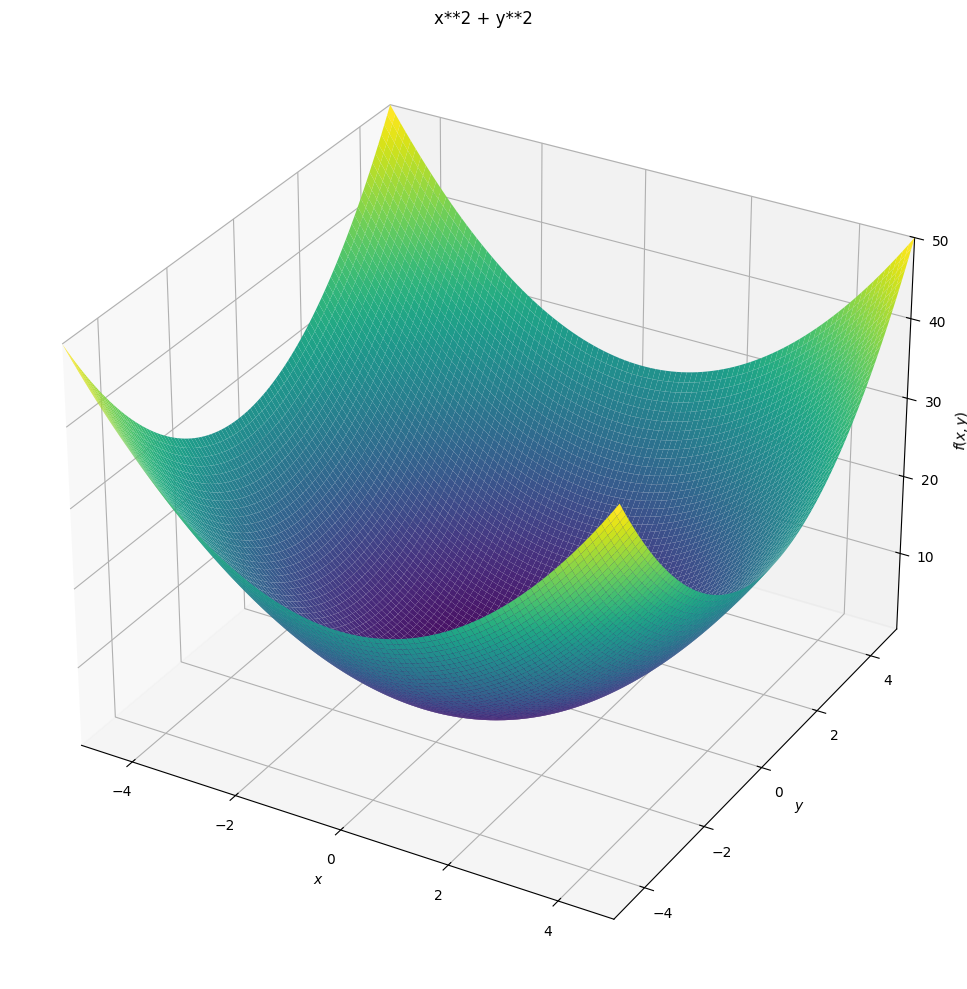

In [97]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

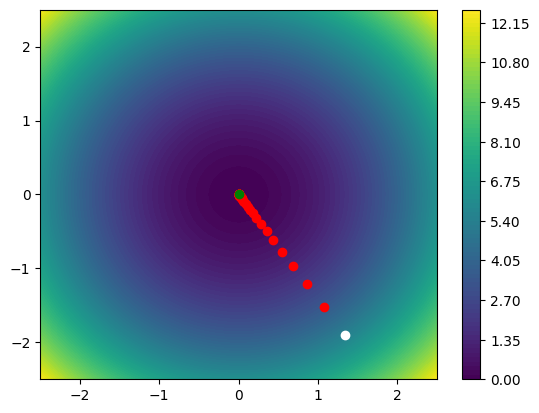

Solucion: [1.9133979317170328e-05, -2.7074297698104183e-05] 1.0991267603554715e-09


In [98]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=2.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-2,2  ),random.uniform(-2,2 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:500
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
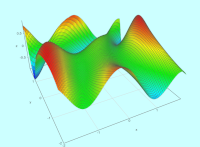


In [99]:
#Definimos la funcion
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )

df = lambda X: [math.cos(0.5*X[0]**2 - 0.25*X[1]**2 + 3) * X[0] * math.cos(2*X[0] + 1 - math.exp(X[1]))
                -
                math.sin(0.5*X[0]**2 - 0.25*X[1]**2 + 3) * math.sin(2*X[0] + 1 - math.exp(X[1])) * 2
                ,
                math.cos(0.5*X[0]**2 - 0.25*X[1]**2 + 3) * (-0.5*X[1]) * math.cos(2*X[0] + 1 - math.exp(X[1]))
                +
                math.sin(0.5*X[0]**2 - 0.25*X[1]**2 + 3) * math.sin(2*X[0] + 1 - math.exp(X[1])) * math.exp(X[1])
]  # df/dx, df/dy

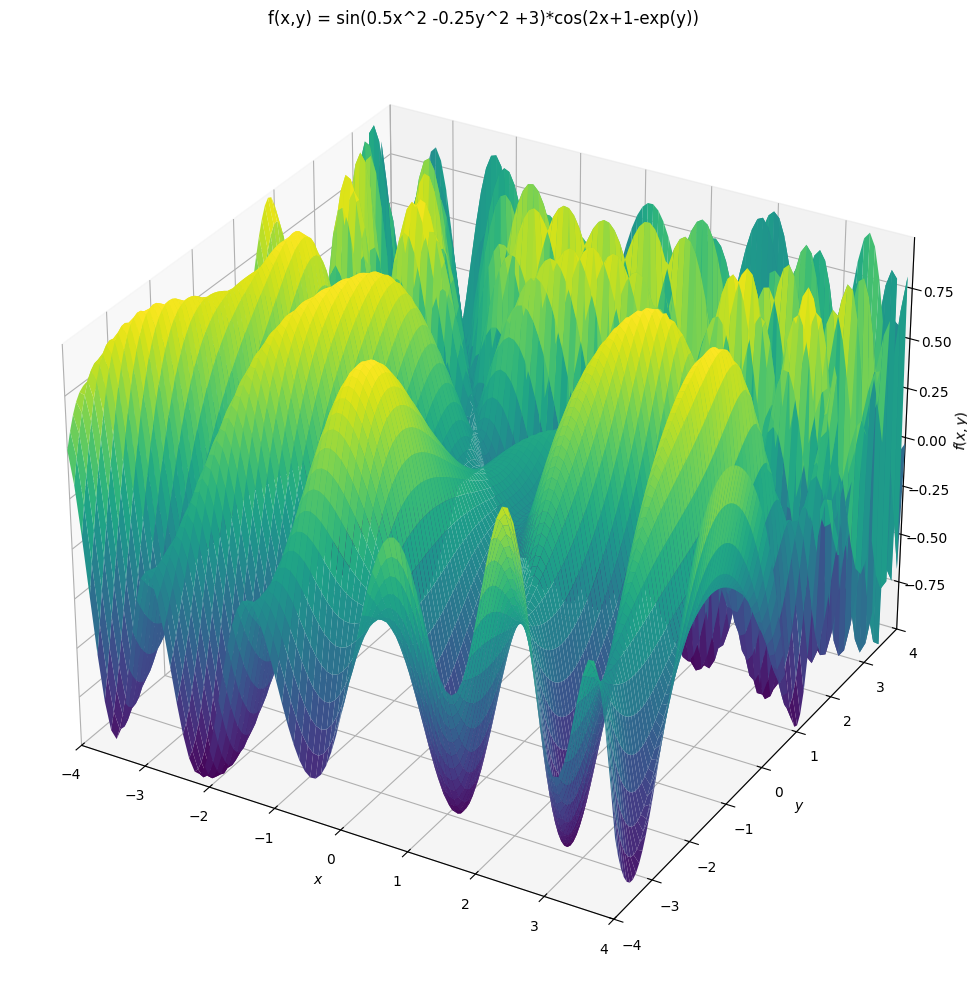

In [100]:
from sympy import symbols, sin, cos, exp
from sympy.plotting import plot3d

# Variables simbólicas
x, y = symbols('x y')

# Graficamos en un rango razonable
plot3d(
    sin(0.5*x**2 - 0.25*y**2 + 3) * cos(2*x + 1 - exp(y)),
    (x, -4, 4),
    (y, -4, 4),
    title="f(x,y) = sin(0.5x^2 -0.25y^2 +3)*cos(2x+1-exp(y))",
    size=(10,10))

En la gráfica se observa que la función presenta múltiples mínimos locales. Por este motivo, se implementa un algoritmo de descenso del gradiente, incorporando distintas condiciones iniciales, con el objetivo de aproximarse al mínimo global de la función.

In [101]:
def grad_descent(X0, a = 0.05, iter = 2000):
  X = X0[:]
  for i in range(iter):
    g = df(X)                   # Calculamos el gradiente, iremos en dirección contraria
    X[0] -= a * g[0]
    X[1] -= a * g[1]
  return X, f(X)

In [102]:
X_min, f_min = grad_descent([0,0])
print("Empezando desde el origen:")
print("Mínimo encontrado:")
print("X =", X_min)
print("f(X) =", f_min)

Empezando desde el origen:
Mínimo encontrado:
X = [0.0, 0.0]
f(X) = 0.1411200080598672


Vemos que el origen es un mínimo, por lo que conviene probar con distintos puntos de partida

In [103]:
mejor_val = float("inf")
mejor_X = None

inis = [[-3,-2],[1,2],[-2,3],[0,-10]]

for X0 in inis:
    X_fin, f_fin = grad_descent(X0)
    print("Inicio:", X0, "→ termina en:", X_fin, " f =", f_fin)
    if f_fin < mejor_val:
        mejor_val = f_fin
        mejor_X = X_fin

print("Mejor mínimo encontrado:")
print("X =", mejor_X)
print("f(X) =", mejor_val)

Inicio: [-3, -2] → termina en: [-3.635609013737056, -4.425579044598965]  f = -1.0
Inicio: [1, 2] → termina en: [0.32274246216582186, 1.6024082724400934]  f = -0.6574000294758535
Inicio: [-2, 3] → termina en: [-0.7518855095491878, 1.9374926307609752]  f = 0.2844894812305542
Inicio: [0, -10] → termina en: [-0.49996950216004554, -9.704707517463623]  f = -1.0
Mejor mínimo encontrado:
X = [-3.635609013737056, -4.425579044598965]
f(X) = -1.0


Vemos que a partir de x0 = -3, y0 = -2, o de x0 = 0, y0 = -10, alcanzamos mínimos globales equivalentes, alcanzando el mismo valor mínimo f(x,y) = -1, el cual es el mínimo global real de la función trigonométrica.

##Problema de Autobuses por Fuerza Bruta

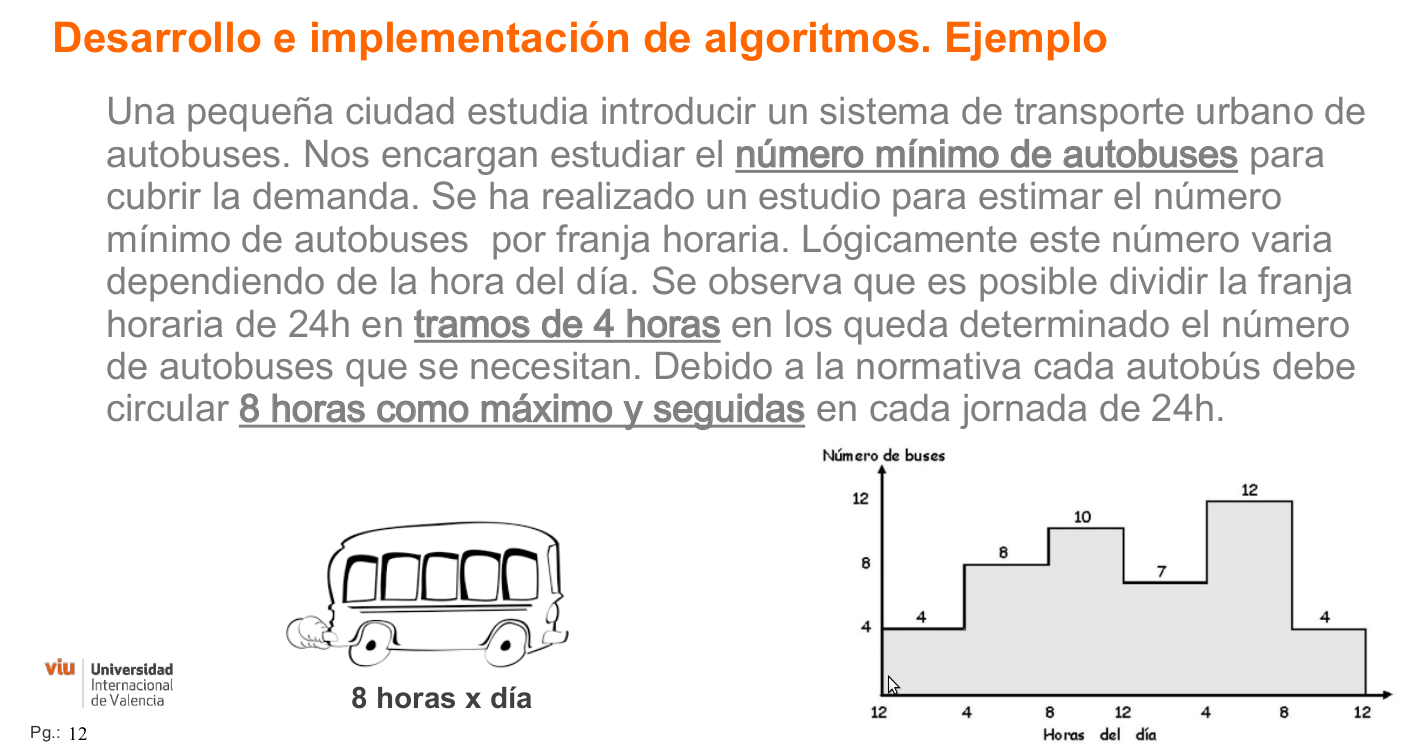

In [104]:
###################################################
# Ximo Sanz Tornero.
###################################################
from itertools import product

# Paso 1: Inicializamos los datos
# Demanda mínima de autobuses por tramo
demanda = [4, 8, 10, 7, 12, 4]  # d[0], d[1], ..., d[5]
tramos = len(demanda)  # Número de tramos (6 en este caso)


#Posible Solucion
x = [4,5,6,7,8,9]

for t in range(tramos):
    # Calculamos el número actual de autobuses que están cubriendo el tramo t
    cobertura_actual = x[t] + x[t - 1]  # Autobuses en t y t-1 (cíclico)

    # Si la cobertura actual es menor que la demanda, añadimos autobuses en t
    if cobertura_actual < demanda[t]:
        # Añadimos los autobuses necesarios en el tramo t
        x[t] += demanda[t] - cobertura_actual

#Función objetivo
f_objetivo = sum(x)


# Se crean funciones tanto para verificar posibles soluciones como para obtener el valor de la función objetivo de la solución
# Función objetivo: suma de todos los x[i]
def funcion_objetivo(solucion):
    return sum(solucion)

# Verificación de restricciones
def verifica_restricciones(solucion):
    for t in range(tramos):
        # Se calcula el número actual de autobuses que están cubriendo el tramo t
        cobertura_actual = solucion[t] + solucion[t - 1]  # Cíclico
        if cobertura_actual < demanda[t]:
            return False
    return True


# Se realiza el algoritmo por fuerza bruta con todas las posibles combinaciones de valores que tenemos en funcion de la variable demanda
# Generación del espacio de soluciones
# Para ver mejor el funcionamiento, ejecutar: for solucion in product(*(range(d + 1) for d in [1,2,3])):   print(solucion)
espacio_soluciones = product(*(range(d + 1) for d in demanda))

# Búsqueda de la mejor solución
mejor_valor_objetivo = float('inf')
mejores_soluciones = []

for solucion in espacio_soluciones:
    if verifica_restricciones(solucion):
        valor_objetivo = funcion_objetivo(solucion)
        if valor_objetivo < mejor_valor_objetivo:
            mejor_valor_objetivo = valor_objetivo
            mejores_soluciones = [solucion]
        elif valor_objetivo == mejor_valor_objetivo:
            mejores_soluciones.append(solucion)  # Agrega soluciones con el mismo valor

# Resultado
print("Mejores soluciones:")
for solucion in mejores_soluciones:
    print(solucion)
print("Valor mínimo de la función objetivo:", mejor_valor_objetivo)



Mejores soluciones:
(0, 8, 2, 5, 7, 4)
(0, 8, 2, 6, 6, 4)
(0, 8, 2, 7, 5, 4)
(1, 7, 3, 4, 8, 3)
(1, 7, 3, 5, 7, 3)
(1, 7, 3, 6, 6, 3)
(1, 7, 3, 7, 5, 3)
(1, 8, 2, 5, 7, 3)
(1, 8, 2, 6, 6, 3)
(1, 8, 2, 7, 5, 3)
(2, 6, 4, 3, 9, 2)
(2, 6, 4, 4, 8, 2)
(2, 6, 4, 5, 7, 2)
(2, 6, 4, 6, 6, 2)
(2, 6, 4, 7, 5, 2)
(2, 7, 3, 4, 8, 2)
(2, 7, 3, 5, 7, 2)
(2, 7, 3, 6, 6, 2)
(2, 7, 3, 7, 5, 2)
(2, 8, 2, 5, 7, 2)
(2, 8, 2, 6, 6, 2)
(2, 8, 2, 7, 5, 2)
(3, 5, 5, 2, 10, 1)
(3, 5, 5, 3, 9, 1)
(3, 5, 5, 4, 8, 1)
(3, 5, 5, 5, 7, 1)
(3, 5, 5, 6, 6, 1)
(3, 5, 5, 7, 5, 1)
(3, 6, 4, 3, 9, 1)
(3, 6, 4, 4, 8, 1)
(3, 6, 4, 5, 7, 1)
(3, 6, 4, 6, 6, 1)
(3, 6, 4, 7, 5, 1)
(3, 7, 3, 4, 8, 1)
(3, 7, 3, 5, 7, 1)
(3, 7, 3, 6, 6, 1)
(3, 7, 3, 7, 5, 1)
(3, 8, 2, 5, 7, 1)
(3, 8, 2, 6, 6, 1)
(3, 8, 2, 7, 5, 1)
(4, 4, 6, 1, 11, 0)
(4, 4, 6, 2, 10, 0)
(4, 4, 6, 3, 9, 0)
(4, 4, 6, 4, 8, 0)
(4, 4, 6, 5, 7, 0)
(4, 4, 6, 6, 6, 0)
(4, 4, 6, 7, 5, 0)
(4, 5, 5, 2, 10, 0)
(4, 5, 5, 3, 9, 0)
(4, 5, 5, 4, 8, 0)
(4, 5, 5, 5, 7, 0)
(4, 5, 

In [105]:
for solucion in product(*(range(d + 1) for d in [1,2,3])):   print(solucion)

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(0, 1, 3)
(0, 2, 0)
(0, 2, 1)
(0, 2, 2)
(0, 2, 3)
(1, 0, 0)
(1, 0, 1)
(1, 0, 2)
(1, 0, 3)
(1, 1, 0)
(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(1, 2, 0)
(1, 2, 1)
(1, 2, 2)
(1, 2, 3)


##Extra: Problema de Asignacion de tarea: Ramificacion y Poda vs Fuerza Bruta

In [106]:
# Reutilizamos la matriz COSTES 4x4 anterior

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]

# Tiempo de ejecución del problema con RyP:

import time

def RyP(matrix):
  start = time.time()
  # matrix = list(map(list, zip(*matrix)))
  result = ramificacion_y_poda(matrix)
  end = time.time()
  duration = round(end-start,5)
  print("Tiempo de ejecución:", duration, "segundos")

RyP(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4
Tiempo de ejecución: 0.00018 segundos


In [107]:
# Definimos matrices de mayor dimension y calculamos de la misma manera sus
# duraciones haciendo RyP

import numpy as np

COSTES5x5 = np.random.randint(10,41,5*5).reshape(5,5)
print(COSTES5x5)
COSTES6x6 = np.random.randint(10,41,6*6).reshape(6,6)
print(COSTES6x6)
COSTES7x7 = np.random.randint(10,41,7*7).reshape(7,7)
print(COSTES7x7)

[[17 36 32 18 24]
 [13 23 38 17 26]
 [36 33 16 27 23]
 [16 18 31 36 37]
 [38 22 34 19 10]]
[[16 20 11 37 16 29]
 [29 20 11 34 13 23]
 [17 21 35 34 33 36]
 [17 36 11 39 37 30]
 [19 22 10 21 22 29]
 [22 16 29 37 33 37]]
[[25 32 16 12 10 36 34]
 [19 35 17 34 29 31 27]
 [36 22 33 13 40 27 19]
 [11 38 20 33 40 28 18]
 [22 20 17 27 32 20 32]
 [29 10 11 28 18 36 11]
 [17 13 27 16 23 37 26]]


In [108]:
RyP(COSTES5x5)
RyP(COSTES6x6)
RyP(COSTES7x7)

La solucion final es: [{'s': (3, 0, 2, 1, 4), 'ci': np.int64(75)}]  en  19  iteraciones  para dimension:  5
Tiempo de ejecución: 0.00066 segundos
La solucion final es: [{'s': (0, 4, 1, 2, 3, 5), 'ci': np.int64(119)}]  en  106  iteraciones  para dimension:  6
Tiempo de ejecución: 0.00279 segundos
La solucion final es: [{'s': (4, 2, 3, 0, 5, 6, 1), 'ci': np.int64(95)}]  en  210  iteraciones  para dimension:  7
Tiempo de ejecución: 0.00983 segundos


In [109]:
### Aplicación de FUERZA BRUTA

import itertools

def brute_force_assig(matrix):
  start = time.time()
  n = len(matrix)
  best_cost = float("inf")
  best_assig = None
  perms = 0

  for comb in itertools.permutations(range(n)):
    perms += 1
    cost = 0
    for i in range(n):
      cost += matrix[comb[i]][i]
    if cost < best_cost:
      best_cost = cost
      best_assig = comb
  end = time.time()
  duration = round(end-start,5)
  print("Tiempo de ejecución:", duration, "segundos")
  print("Número de permutaciones:", perms)
  print("Mejor asignación:", best_assig)
  print("Coste:", best_cost)

brute_force_assig(COSTES)
brute_force_assig(COSTES5x5)
brute_force_assig(COSTES6x6)
brute_force_assig(COSTES7x7)

Tiempo de ejecución: 3e-05 segundos
Número de permutaciones: 24
Mejor asignación: (0, 3, 1, 2)
Coste: 61
Tiempo de ejecución: 0.00053 segundos
Número de permutaciones: 120
Mejor asignación: (1, 3, 2, 0, 4)
Coste: 75
Tiempo de ejecución: 0.00266 segundos
Número de permutaciones: 720
Mejor asignación: (2, 5, 3, 4, 0, 1)
Coste: 104
Tiempo de ejecución: 0.01771 segundos
Número de permutaciones: 5040
Mejor asignación: (3, 6, 1, 2, 0, 4, 5)
Coste: 95


Al permutar para obtener todas las posibles soluciones pero escogiendo la que tiene menos coste, la complejidad del algoritmo usando fuerza bruta es O(n!).

Dados los resultados al ejecutar ambos algoritmos, es importante señalar que en fuerza bruta se cuenta con un número de soluciones posibles muchisimo mayor y dependiendo de la dimensión de la matriz de costes de entrada, aumenta de forma factorial.

A partir de 6 o 7 dimensiones, la fuerza bruta deja de ser una mejor opción que ramificación y poda, aunque para dimensiones menores (2,3 o 4), fuerza bruta sigue dando resultados de forma mas rápida.